In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Read data

In [21]:
diabete_data=pd.read_csv('./data/diabetes_data_upload.csv')

##### Understanding the dataset

In [22]:
diabete_data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [23]:
diabete_data.sample(30)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
356,43,Male,No,No,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Negative
201,28,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Negative
443,35,Male,Yes,No,Yes,No,No,No,No,No,No,No,Yes,No,Yes,No,Positive
228,45,Male,No,No,No,Yes,No,No,No,Yes,Yes,Yes,Yes,No,No,No,Negative
400,44,Male,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,Yes,Negative
453,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
31,41,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Positive
325,43,Male,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,Negative
131,43,Male,Yes,No,No,No,Yes,No,No,No,Yes,No,No,Yes,No,No,Positive
434,53,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No,Positive


In [24]:
diabete_data.shape

(520, 17)

In [25]:
diabete_data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [26]:
diabete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

- We have realized that there are no nan data, dataset is fully complete

### We are going to transform data (some strings to int values)
- we do so by using LabelEncoder from preprocessing package

### Convert Gender Column alone as an example

In [27]:
encoder=preprocessing.LabelEncoder()
diabete_data['Gender']=encoder.fit_transform(diabete_data['Gender'])

In [28]:
diabete_data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,1,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,1,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,1,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,1,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,0,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,0,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,0,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


#### From above insights we can see that Gender column is transformed
#### So, We are going to quickly transform other remaining columns

In [29]:
columns=diabete_data.columns
remaining_columns=columns[2:]
remaining_columns

Index(['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [30]:
for column in remaining_columns:
    diabete_data[column]=encoder.fit_transform(diabete_data[column])

In [31]:
diabete_data # printing th dataset to see if the transformation is successfully done

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


###### - After transformation,  for other variables not class, 1 represents Yes, while 0 represents No
###### - While for class, which is the dependant varible, 1 represents Positive and 0 represents Negative

### Specifying x and y data

In [32]:
x_columns=columns[:-1]
y_column=columns[-1]

### X data and Y data

In [33]:
x=diabete_data[x_columns]
y=diabete_data[y_column]

### We are going to build three different models and compare them.

#### - To make sure is model is well explored, we are going to use a technique known as Hyper-parameter tuning
#### - And then we use GridSearch to scan for the optimal parameters of each model
#### - Then we will use best of the best parameters returned from GridSearch to compare the accuracy of the 3 models

In [34]:
## The below dictionary holds data for all three models and their parameters
## The parameters we have used, we reffered to the algorithms documentation as shown below

"""
{
    random_forest_clssifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html ,
    logistic_regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  ,
    KNN_classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
}
"""
model_data={
    'logistic':{
        'model': LogisticRegression(),
        'params':{
            'random_state':[0,1]
        }
    },
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[i for i in range(1,21,5)],
            'algorithm': ['auto', 'ball_tree'],
            'weights':['uniform','distance'],
            'p':[2],
            'leaf_size':[i for i in range(1,21,6)],
            'metric':['manhattan','canberra','euclidean']
        }
    },
    'forest':{
         'model': RandomForestClassifier(),
        'params':{
            'n_estimators':[i for i in range(1,200,50)],
            'criterion':['gini','entropy'],
            'max_features': ['auto', 'sqrt', 'log2'],
            'verbose':[0,1],
            'bootstrap':[True,False],
            'max_depth':[i for i in range(1,20,5)]
        }
    }
}

#### Using GridSearch, we are going to scan models with all of their parameters, then the grid search return for each model and its      ##### optimal parameters
###### - We have used GridSearchCV that internally use cross-valiidation

In [35]:
accuracies=list()
for model in model_data.keys():
    print(f"Currently, {model} is running")
    grid_search=GridSearchCV(model_data[model]['model'], model_data[model]['params'], cv=10, return_train_score=True, verbose=1)
    grid_search.fit(x,y)
    accuracies.append({'model':model,
                            'best_score':grid_search.best_score_,
                            'best_params':grid_search.best_params_,
                            'best_index':grid_search.best_index_,
                            'scorer':grid_search.scorer_,
                            'splits':grid_search.n_splits_,
                            'estimators':grid_search.best_estimator_
                           })

Currently, logistic is running
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

Currently, knn is running
Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Currently, forest is running
Fitting 10 folds for each of 384 candidates, totalling 3840 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [38]:
### Accuracies from GridSearchCV
accuracies

[{'model': 'logistic',
  'best_score': 0.9307692307692307,
  'best_params': {'random_state': 0},
  'best_index': 0,
  'scorer': <function sklearn.metrics._scorer._passthrough_scorer(estimator, *args, **kwargs)>,
  'splits': 10,
  'estimators': LogisticRegression(random_state=0)},
 {'model': 'knn',
  'best_score': 0.973076923076923,
  'best_params': {'algorithm': 'auto',
   'leaf_size': 1,
   'metric': 'canberra',
   'n_neighbors': 1,
   'p': 2,
   'weights': 'uniform'},
  'best_index': 8,
  'scorer': <function sklearn.metrics._scorer._passthrough_scorer(estimator, *args, **kwargs)>,
  'splits': 10,
  'estimators': KNeighborsClassifier(leaf_size=1, metric='canberra', n_neighbors=1)},
 {'model': 'forest',
  'best_score': 0.9884615384615385,
  'best_params': {'bootstrap': False,
   'criterion': 'gini',
   'max_depth': 11,
   'max_features': 'sqrt',
   'n_estimators': 51,
   'verbose': 1},
  'best_index': 251,
  'scorer': <function sklearn.metrics._scorer._passthrough_scorer(estimator, *ar

In [103]:
### For Logistic
print(f" Logistic Regression estimator {accuracies[0]['estimators']}")

 Logistic Regression estimator LogisticRegression(random_state=0)


In [104]:
### KNN classifier estimator
print(f" KNN classifier estimator {accuracies[1]['estimators']}")

 KNN classifier estimator KNeighborsClassifier(leaf_size=1, metric='canberra', n_neighbors=1)


In [35]:
### KNN classifier estimator
print(f" Random forest classifier estimator {accuracies[2]['estimators']}")

 Random forest classifier estimator RandomForestClassifier(criterion='entropy', max_depth=16, max_features='log2',
                       n_estimators=101, verbose=1)


##### With the resulted estimators, we are going to do both cross validation and test split to see the difference of both approach

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#### Test split with LogisticRegression, KNN and RandomForest model

In [46]:
import warnings
warnings.filterwarnings('ignore')
logist=LogisticRegression(random_state=0)
logist.fit(X_train, y_train)
values_predicted_log=logist.predict(X_test)
values_predicted_log

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0])

In [48]:
knn=KNeighborsClassifier(leaf_size=1, metric='canberra', n_neighbors=1)
knn.fit(X_train, y_train)
values_predicted_knn=knn.predict(X_test)
values_predicted_knn

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0])

In [51]:
warnings.filterwarnings('ignore')
r_fores=RandomForestClassifier(bootstrap=False, max_depth=11, max_features='sqrt',n_estimators=51, verbose=1)
r_fores.fit(X_train, y_train)
values_predicted_rf=r_fores.predict(X_test)
values_predicted_rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.0s finished


array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0])

##### finding the accuracy of  models

In [64]:
## Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

from sklearn.metrics import accuracy_score
test_results=list()
logistic_accuracy_1=accuracy_score(y_test,values_predicted_log)
test_results.append(logistic_accuracy_1)
print(f"Logistic Regression accuracy is {logistic_accuracy_1}")

knn_accuracy_1=accuracy_score(y_test,values_predicted_knn)
test_results.append(knn_accuracy_1)
print(f"KNN accuracy is {knn_accuracy_1}")

rf_accuracy_1=accuracy_score(y_test, values_predicted_rf)
test_results.append(rf_accuracy_1)
print(f"Random Forest accuracy is {rf_accuracy_1}")

Logistic Regression accuracy is 0.9358974358974359
KNN accuracy is 0.9743589743589743
Random Forest accuracy is 0.9935897435897436


##### Calculating accuracy using Cross-validation

In [65]:
from sklearn.model_selection import cross_val_score
def crossValidation(X, Y, model):
    if model == "logistic":
        model_=LogisticRegression(random_state=0)
        model_accuracies=cross_val_score(model_, X,Y, cv=10)
        return np.array(model_accuracies).mean()
    elif model == "knn":
        model_=KNeighborsClassifier(leaf_size=1, metric='canberra', n_neighbors=1)
        model_accuracies=cross_val_score(model_, X,Y, cv=10)
        return np.array(model_accuracies).mean()
    elif model == "forest":
        model_= RandomForestClassifier(bootstrap=False, max_depth=11, max_features='sqrt',n_estimators=51, verbose=1)
        model_accuracies=cross_val_score(model_, X,Y, cv=10)
        return np.array(model_accuracies).mean()
    else:
        pass

In [66]:
warnings.filterwarnings('ignore')
crossVal_results=list()
logistic_accuracy_2=crossValidation(x,y,"logistic")
crossVal_results.append(logistic_accuracy_2)
print(f"Logistic Regression accuracy is {logistic_accuracy_2}")

knn_accuracy_2=crossValidation(x,y,"knn")
crossVal_results.append(knn_accuracy_2)
print(f"KNN accuracy is {knn_accuracy_2}")

rf_accuracy_2=crossValidation(x,y,"forest")
crossVal_results.append(rf_accuracy_2)
print(f"Random Forest accuracy is {rf_accuracy_2}")

Logistic Regression accuracy is 0.9307692307692307
KNN accuracy is 0.973076923076923


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Random Forest accuracy is 0.9807692307692306


[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.0s finished


#### Showing the results using graph

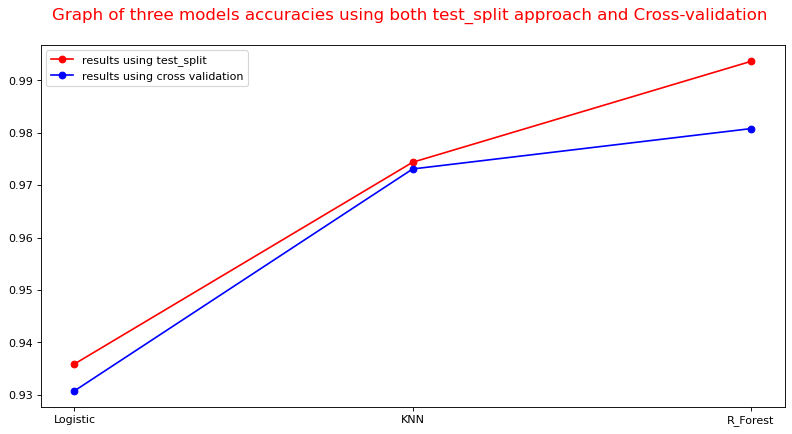

In [108]:
models=['Logistic','KNN','R_Forest']
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(models, test_results, 'o-', color='r', label='results using test_split')
plt.plot(models, crossVal_results,'o-', color='b', label='results using cross validation')
plt.title('Graph of three models accuracies using both test_split approach and Cross-validation \n', size=15, color='r')
plt.legend()
plt.show()

#### Confusion Matrix

In [109]:
## Reference:  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
logistic_matrix=confusion_matrix(y_test,values_predicted_log)

knn_matrix=confusion_matrix(y_test,values_predicted_knn)

forest_matrix=confusion_matrix(y_test, values_predicted_rf)

#### Plotting confusion matrices

In [110]:
def graph_confusion_matrix(cmatrix):
    # Print the confusion matrix using Matplotlib
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(cmatrix, cmap=plt.cm.Greens)
    for i in range(cmatrix.shape[0]):
        for j in range(cmatrix.shape[1]):
            ax.text(x=j, y=i,s=cmatrix[i, j], va='center', ha='center', size='large')

    plt.xlabel('Predicted values', fontsize=12)
    plt.ylabel('Actual values', fontsize=12)
    plt.title('Confusion Matrix', fontsize=12)
    plt.show()

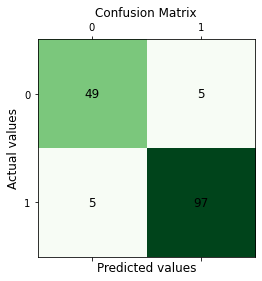

In [111]:
### Logistic Regression
graph_confusion_matrix(logistic_matrix)

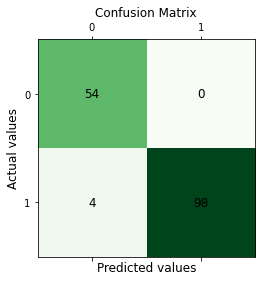

In [112]:
### KNN classifier
graph_confusion_matrix(knn_matrix)

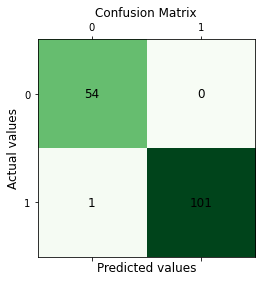

In [113]:
### Random forest 
graph_confusion_matrix(forest_matrix)

#### f1-score, precision and recall

#### Using Classification Report
- Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [55]:
from sklearn.metrics import classification_report
logistic_report=classification_report(y_test, values_predicted_log)

In [56]:
knn_report=classification_report(y_test, values_predicted_knn)

In [57]:
rf_report=classification_report(y_test, values_predicted_rf)

##### Displaying Logistic Regression Report

In [59]:
print(logistic_report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.95      0.95      0.95       102

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



#### Displaying KNN classifier report

In [60]:
print(knn_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        54
           1       1.00      0.96      0.98       102

    accuracy                           0.97       156
   macro avg       0.97      0.98      0.97       156
weighted avg       0.98      0.97      0.97       156



#### Displaying Random Forest Classsifier report

In [61]:
print(rf_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.98      0.99       102

    accuracy                           0.99       156
   macro avg       0.98      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



# Metadata

Course Name: Programming and Problem Solving for Data Analytics

Course Code: 04802-E

Instructor: George Okeyo.

TAs: [Faustin, Janvier, Pacifique]

Assignment Title:Assignment IV- Build ML Models.

Report Title: prediction of early stage diabetes in patients

Group Members: Manzi Patrick(pmanzi), Mugiraneza himbaza Yves(ymugiran), Jean Paul Nishimirwe(jnishimi), Uwase Maliki(muwase).

Submission Date: 3:23 AM 1/12/2021
